In [282]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv #OpenCV module 

In [283]:

# Read RGB image
img = cv.imread('images/dw.jpg', cv.COLOR_BGR2RGB )
 

 # Convert BGR to HSV
# hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) #converter para cor 
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
# define range of blue color in HSV
# lower_blue = np.array([110,50,50])
# upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
# mask = cv.inRange(hsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
# res = cv.bitwise_and(img,img, mask= mask)

# cv.imshow('frame',img)
# cv.imshow('mask',mask)
# cv.imshow('res',res)

# k = cv.waitKey(5) & 0xFF

# Output img with window name as 'image'
# cv.imshow('image', img)

# Maintain output window utill user presses a key
cv.waitKey(0)       
 
# Destroying present windows on screen
cv.destroyAllWindows()

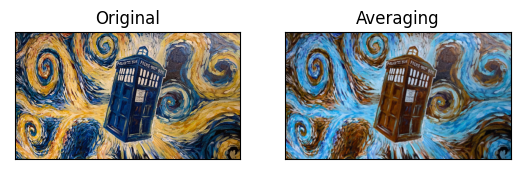

In [284]:
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(dst, cv.COLOR_RGB2BGR)),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


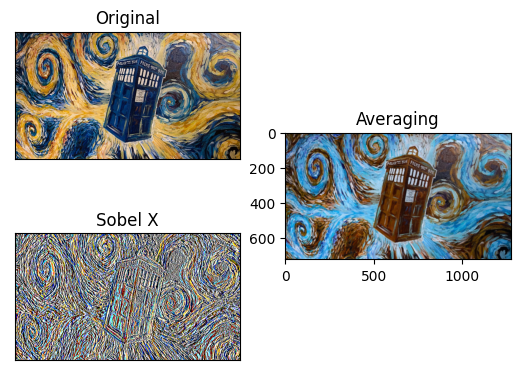

In [285]:
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(dst, cv.COLOR_RGB2BGR)),plt.title('Averaging')
plt.show()

(Text(0.5, 1.0, 'Linhas'), ([], []), ([], []))

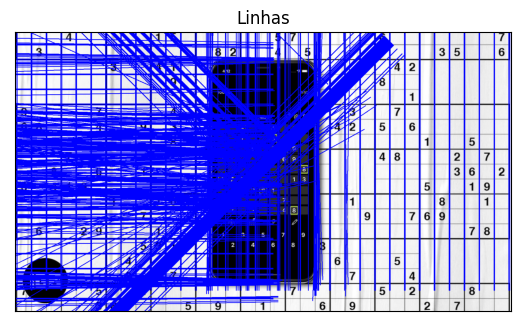

In [286]:

img = cv.imread(cv.samples.findFile('images/iphone-sudoku.jpg'))

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(img)
plt.title('Linhas'), plt.xticks([]), plt.yticks([])
# cv.imwrite('images/doctorwho.jpg',img)